# USA in the Olympics

### 120 years of Olympic history: 
- This Dataset is taken from Kaggle. It can be found on the below link:
    - https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
    
This dataset contains basic bio data on athletes and medal results from Athens 1896 to Rio 2016

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
events = pd.read_csv('./120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
regions = pd.read_csv('./120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

In [4]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [149]:
events.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
events.shape

(271116, 15)

In [6]:
events.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

#### By the above values, We can find that Age, Height, Weight and Medals have lot of missing values. The medal column have 231333 missing values. This is fine because not all the participants win a medal. So we will replace this values with No - No Medal

In [7]:
events['Medal'].fillna('No Medal', inplace = True)


In [8]:
events.isnull().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

In [151]:
regions.shape

(230, 3)

In [10]:
del regions['notes']
regions.rename(columns = {'region':'Country'}, inplace = True)
regions.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [11]:
olympics = events.merge(regions, on = 'NOC', how = 'left')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [12]:
olympics.loc[olympics['Country'].isnull(),['Team','NOC']].drop_duplicates()

,Team,NOC
578,Singapore,SGP
6267,Refugee Olympic Athletes,ROT
44376,June Climene,SGP
61080,Unknown,UNK
64674,Tuvalu,TUV
80986,Rika II,SGP
108582,Singapore-2,SGP
235895,Singapore-1,SGP


**The Above NOC present in the olympic events dataset does not associate to a country in the regions dataset. But we can easily add them manually based on their TEAM Name**

### Filling all NA Values in the Country Column with the Team Names

In [13]:
olympics.Country.fillna(olympics.Team, inplace = True)

In [14]:
len(olympics.Country.unique().tolist())

213

In [15]:
olympics['Medal'].unique().tolist()

['No Medal', 'Gold', 'Bronze', 'Silver']

In [16]:
olympics1 = olympics.replace({'Medal':{'Gold': 1,'Silver': 1,'Bronze':1, 'No Medal': 0}})


In [17]:
olympics1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Netherlands


In [18]:
summer_olympics = olympics1[olympics.Season == 'Summer']
winter_olympics = olympics1[olympics.Season == 'Winter']

# Top 10 countries with highest number of medals.

In [19]:
summer_medal_count = summer_olympics[['Country','Medal']].groupby('Country', as_index = False).sum()
summer_medal_count = summer_medal_count[summer_medal_count.Medal>0].sort_values(by = ['Medal'], ascending = False).head(10)
winter_medal_count = winter_olympics[['Country','Medal']].groupby('Country', as_index = False).sum()
winter_medal_count = winter_medal_count[winter_medal_count.Medal>0].sort_values(by = 'Medal', ascending = False).head(10)

print('-'*5,'SUMMER OLYMPICS', '-'*5)
print(summer_medal_count)
print()
print('-'*5,'WINTER OLYMPICS', '-'*5)
print(winter_medal_count)


----- SUMMER OLYMPICS -----
         Country  Medal
198          USA   5002
154       Russia   3188
67       Germany   3126
197           UK   1985
63        France   1627
87         Italy   1446
10     Australia   1333
78       Hungary   1123
182       Sweden   1108
130  Netherlands    918

----- WINTER OLYMPICS -----
            Country  Medal
82           Russia    759
103             USA    635
36          Germany    630
17           Canada    611
73           Norway    443
92           Sweden    428
33          Finland    426
7           Austria    280
93      Switzerland    275
26   Czech Republic    231


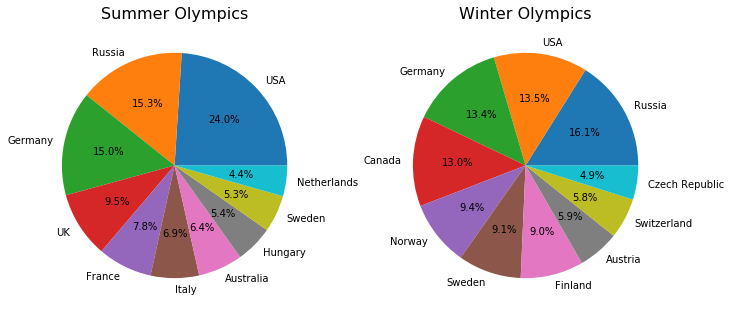

In [20]:
%matplotlib inline

fig,(ax1,ax2) = plt.subplots(1,2)
fig.tight_layout()
fig.set_figheight(12)
fig.set_figwidth(10)
ax1.pie(summer_medal_count.Medal, labels = summer_medal_count.Country, autopct='%1.1f%%')
ax1.set_title('Summer Olympics', fontsize = 16)
ax2.pie(winter_medal_count.Medal, labels = winter_medal_count.Country, autopct='%1.1f%%')
ax2.set_title('Winter Olympics', fontsize = 16)
# ax.axis('equal')

plt.show()

# Report on Initial Data Analysis for USA on Olympics Dataset

### Summer Olympics:
- Among the Top 10 countries with the highest number of medals, we see that **USA ranks No 1** with the most number of medals won. It has achieved 24% of medals among the Top 10.

### Winter Olympics:
- Among the Top 10 countries, USA stands second place with 13.5% of medal won among the Top 10. In Winter Olympics, Russia stand on the Top with 16.1 % of medals won among the Top 10.


    We will dig further in to study how USA has performed over the years.

#  Data Analysis for USA

In [35]:
usa = olympics1[olympics1.Country == 'USA']
summer_usa = usa[usa.Season == 'Summer']
summer_usa.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
186,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",1,USA
273,142,"David ""Dave"" Abbott",M,26.0,183.0,75.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Athletics,"Athletics Men's 5,000 metres",0,USA
282,149,Mara Katherine Abbott,F,30.0,163.0,52.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Road Race, Individual",0,USA
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,1,USA
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,0,USA


In [36]:
winter_usa = usa[usa.Season == 'Winter']

In [37]:
winter_usa.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,0,USA
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,0,USA
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,0,USA
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,0,USA
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,0,USA


In [164]:
summer_usa_years = summer_usa[['Year', 'Medal']].groupby('Year', as_index = False).sum()
summer_event_count = summer_usa.groupby('Year')['Event'].nunique().reset_index()
winter_usa_years = winter_usa[['Year', 'Medal']].groupby('Year', as_index = False).sum()
winter_event_count = winter_usa.groupby('Year')['Event'].nunique().reset_index()

In [159]:
summer_usa_years.head()



,Year,Medal
0,1896,20
1,1900,63
2,1904,394
3,1906,24
4,1908,65


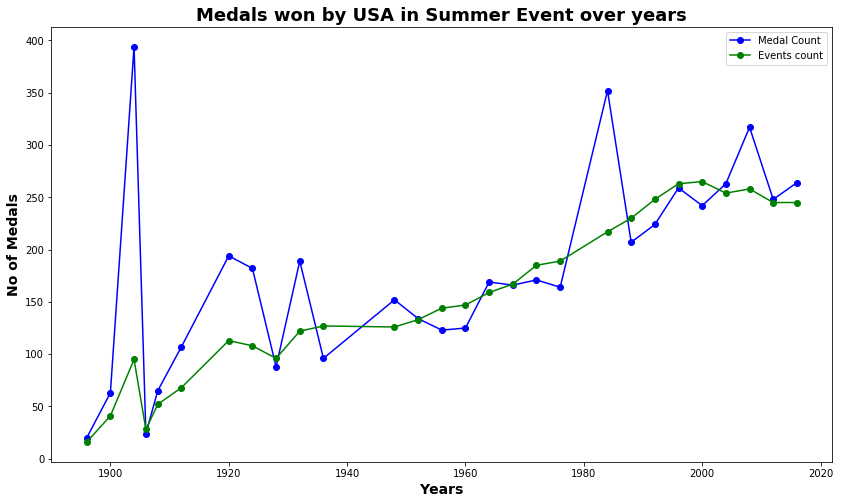

In [161]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (14,8))
plt.plot(summer_usa_years['Year'].values, summer_usa_years['Medal'].values, color = 'blue', marker = 'o', label = 'Medal Count')
plt.plot(summer_event_count['Year'].values, summer_event_count['Event'].values, color = 'green', marker = 'o', label = 'Events count')
plt.xlabel('Years',  fontweight = 'bold', fontsize = 14)
plt.ylabel('No of Medals', fontweight = 'bold',fontsize = 14)
plt.legend()
plt.title('Medals won by USA in Summer Event over years', fontweight = 'bold', fontsize = 18)
plt.show()


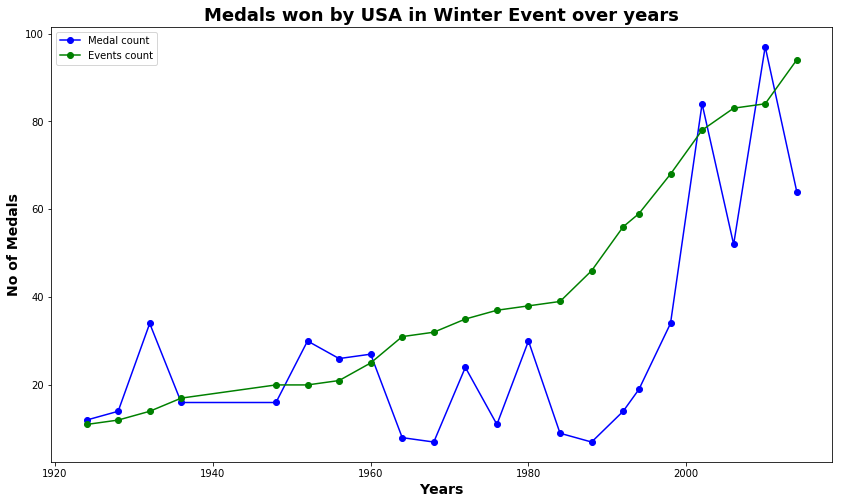

In [162]:
fig,ax = plt.subplots(figsize = (14,8))
plt.plot(winter_usa_years['Year'].values, winter_usa_years['Medal'].values, color = 'blue', marker = 'o', label = 'Medal count')
plt.plot(winter_event_count['Year'].values, winter_event_count['Event'].values, color = 'green', marker = 'o', label = 'Events count')
plt.xlabel('Years',  fontweight = 'bold', fontsize = 14)
plt.ylabel('No of Medals', fontweight = 'bold',fontsize = 14)
plt.legend()
plt.title('Medals won by USA in Winter Event over years', fontweight = 'bold', fontsize = 18)
plt.show()

## Number and type of medals won by USA per sport for Summer Olympics

In [128]:
from functools import reduce

usa_gold_summer = olympics[(olympics['Country'] == 'USA') & (olympics['Season'] == 'Summer') & (olympics['Medal'] == 'Gold')]
usa_silver_summer = olympics[(olympics['Country'] == 'USA') & (olympics['Season'] == 'Summer') & (olympics['Medal'] == 'Silver')]
usa_bronze_summer = olympics[(olympics['Country'] == 'USA') & (olympics['Season'] == 'Summer') & (olympics['Medal'] == 'Bronze')]
usa_nm_summer = olympics[(olympics['Country'] == 'USA') & (olympics['Season'] == 'Summer') & (olympics['Medal'] == 'No Medal')]



In [174]:
usa_gold = usa_gold_summer[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Gold'})
usa_silver = usa_silver_summer[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Silver'})
usa_bronze = usa_bronze_summer[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Bronze'})
events_per_sport = summer_usa.groupby('Sport')['Event'].nunique() \
                    .reset_index() \
                    .rename(columns = {'Event': 'Events per Sport'})
                            
dataframe = [events_per_sport,usa_gold, usa_silver, usa_bronze]
usa_medals_summer = reduce(lambda left,right: pd.merge(left, right, on = 'Sport', how = 'outer'), \
                        dataframe).fillna(0)

print('-------------------------Summer Olympics-------------------')
print()
print(usa_medals_summer.head())

-------------------------Summer Olympics-------------------

              Sport  Events per Sport   Gold  Silver  Bronze
0           Archery                11   22.0    19.0    16.0
1  Art Competitions                16    4.0     5.0     0.0
2         Athletics                78  542.0   317.0   221.0
3         Badminton                 5    0.0     0.0     0.0
4          Baseball                 1   24.0     0.0    44.0


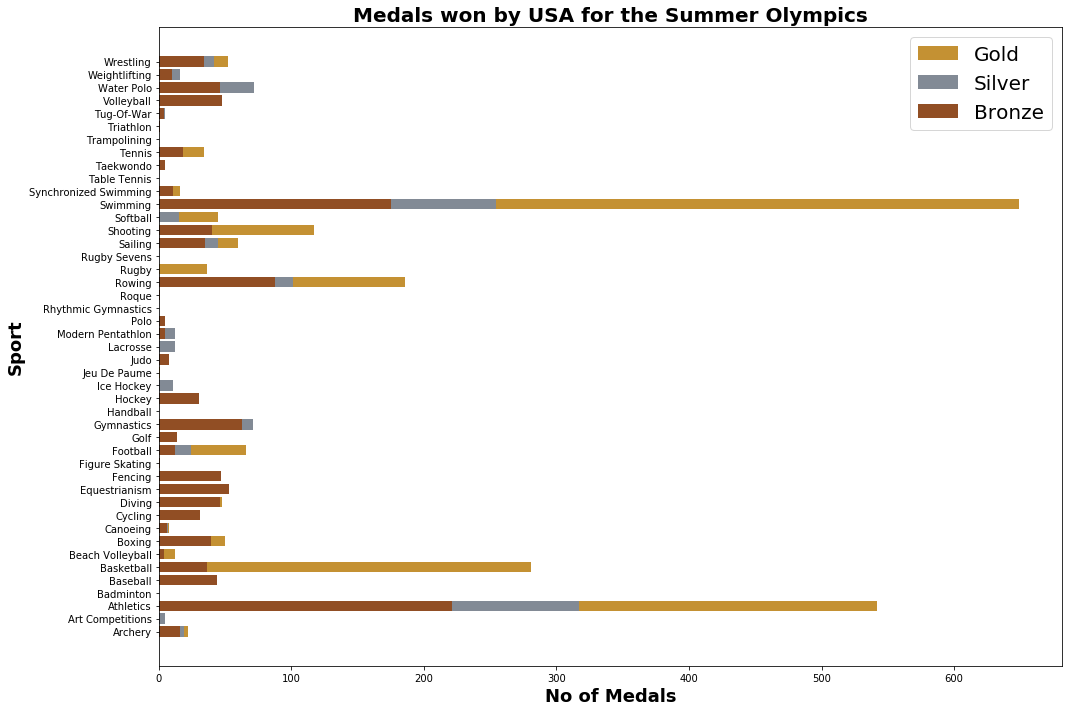

In [144]:
fig,ax = plt.subplots(figsize = (15,10))
plt.barh(usa_medals_summer.Sport.values, usa_medals_summer.Gold.values, color = '#C49133', label = 'Gold')
plt.barh(usa_medals_summer.Sport.values, usa_medals_summer.Silver.values, color = '#828A95', label = 'Silver')
plt.barh(usa_medals_summer.Sport.values, usa_medals_summer.Bronze.values, color = '#914E24', label = 'Bronze')
plt.title('Medals won by USA for the Summer Olympics', fontweight = 'bold', fontsize=20)
plt.xlabel('No of Medals', fontsize = 18, fontweight = 'bold')
plt.ylabel('Sport', fontsize = 18, fontweight = 'bold')
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

## Report on the sports and their medals achieved by USA - Summer Olympics

- By the grapth we can say that, USA has be dominating in **Swimming**, **Rowing**, **Basketball** and in most of the **Athletics** sports. 

- #### No Medals won for the below Sports:
  - Trampolining
  - Table Tennis
  - Rugby Sevens
  - Rhythmic Gymnastics
  - Handball
  - Badminton
- #### No Gold Medals were won for the below Sports:
  - Modern Pentathlon
  - Lacrosse
  - Hockey
  - Figure Skating      
        

## Number and type of medals won by USA per sport for Winter Olympics

In [112]:
usa_gold_winter = olympics[(olympics['Country'] == 'USA') & (olympics['Season'] == 'Winter') & (olympics['Medal'] == 'Gold')]
usa_silver_winter = olympics[(olympics['Country'] == 'USA') & (olympics['Season'] == 'Winter') & (olympics['Medal'] == 'Silver')]
usa_bronze_winter = olympics[(olympics['Country'] == 'USA') & (olympics['Season'] == 'Winter') & (olympics['Medal'] == 'Bronze')]

In [177]:
usa_w_gold = usa_gold_winter[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Gold'})
usa_w_silver = usa_silver_winter[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Silver'})
usa_w_bronze = usa_bronze_winter[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Bronze'})
events_perw_sport = winter_usa.groupby('Sport')['Event'].nunique() \
                    .reset_index() \
                    .rename(columns = {'Event': 'Events per Sport'})
                            
dataframe = [events_perw_sport,usa_w_gold, usa_w_silver, usa_w_bronze]
usa_medals_winter = reduce(lambda left,right: pd.merge(left, right, on = 'Sport', how = 'outer'), \
                        dataframe).fillna(0)
print('-'*30,'Winter Olympics','-'*30)
print()
print(usa_medals_winter)


------------------------------ Winter Olympics ------------------------------

                        Sport  Events per Sport  Gold  Silver  Bronze
0               Alpine Skiing                10  16.0    19.0     9.0
1                    Biathlon                13   0.0     0.0     0.0
2                   Bobsleigh                 4  23.0    23.0    28.0
3        Cross Country Skiing                23   0.0     1.0     0.0
4                     Curling                 2   0.0     0.0     4.0
5              Figure Skating                 5  16.0    21.0    28.0
6            Freestyle Skiing                 9   8.0     7.0     6.0
7                  Ice Hockey                 2  56.0   178.0    31.0
8                        Luge                 4   0.0     4.0     5.0
9             Nordic Combined                 5   1.0     6.0     0.0
10  Short Track Speed Skating                 8   4.0    15.0    23.0
11                   Skeleton                 2   3.0     4.0     1.0
12         

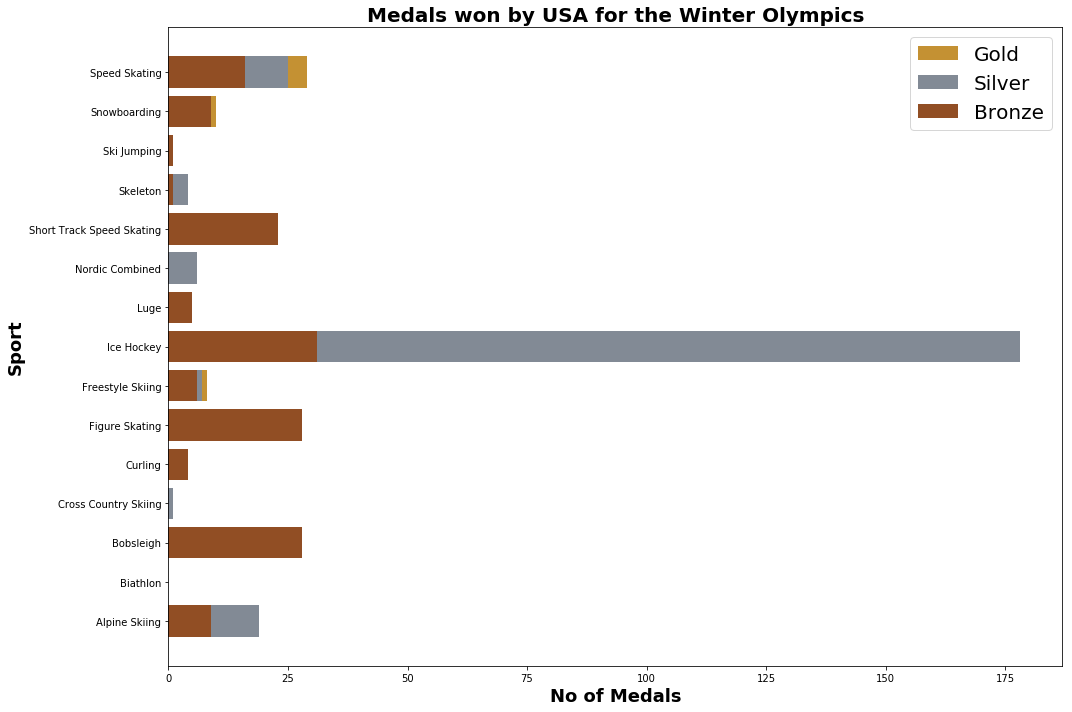

In [145]:
fig,ax = plt.subplots(figsize = (15,10))
plt.barh(usa_medals_winter.Sport.values, usa_medals_winter.Gold.values, color = '#C49133', label = 'Gold')
plt.barh(usa_medals_winter.Sport.values, usa_medals_winter.Silver.values, color = '#828A95', label = 'Silver')
plt.barh(usa_medals_winter.Sport.values, usa_medals_winter.Bronze.values, color = '#914E24', label = 'Bronze')
plt.title('Medals won by USA for the Winter Olympics', fontweight = 'bold', fontsize=20)
plt.xlabel('No of Medals', fontsize = 18, fontweight = 'bold')
plt.ylabel('Sport', fontsize = 18, fontweight = 'bold')
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

## Report on the sports and their medals achieved by USA - Winter Olympics

- By the grapth we can say that, USA has be dominating in **Ice Hockey** and **Speed Skating**. 

- #### No Medals won for the below Sports:
  - Biathlon
 
- #### No Gold Medals were won for the below Sports:
  - Ski Jumping
  - Luge
  - Curling
  - Cross Country Skiing    